# **Exploratory Data Analysis (EDA)**

1.	Load the Mushroom dataset and perform fundamental data exploration.



In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the dataset
file_path = '/content/sample_data/mushroom.csv'
df = pd.read_csv(file_path)

In [6]:
# Get some basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring 

In [7]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [8]:
# Checking for missing values
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [9]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe(include='all'))


Summary statistics of the dataset:
         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  .

In [10]:
#Get the shape of the dataset (rows, columns)
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(2000, 26)


In [11]:
#Display the column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [12]:
#Display the distribution of the target variable (if 'class' is the target)
print("\nDistribution of the target variable (if 'class' is the target):")
if 'class' in df.columns:
    print(df['class'].value_counts())
else:
    print("No 'class' column found in the dataset.")


Distribution of the target variable (if 'class' is the target):
class
poisonous    1400
edible        600
Name: count, dtype: int64


**2. Utilize histograms, box plots, or density plots to understand feature distributions.**

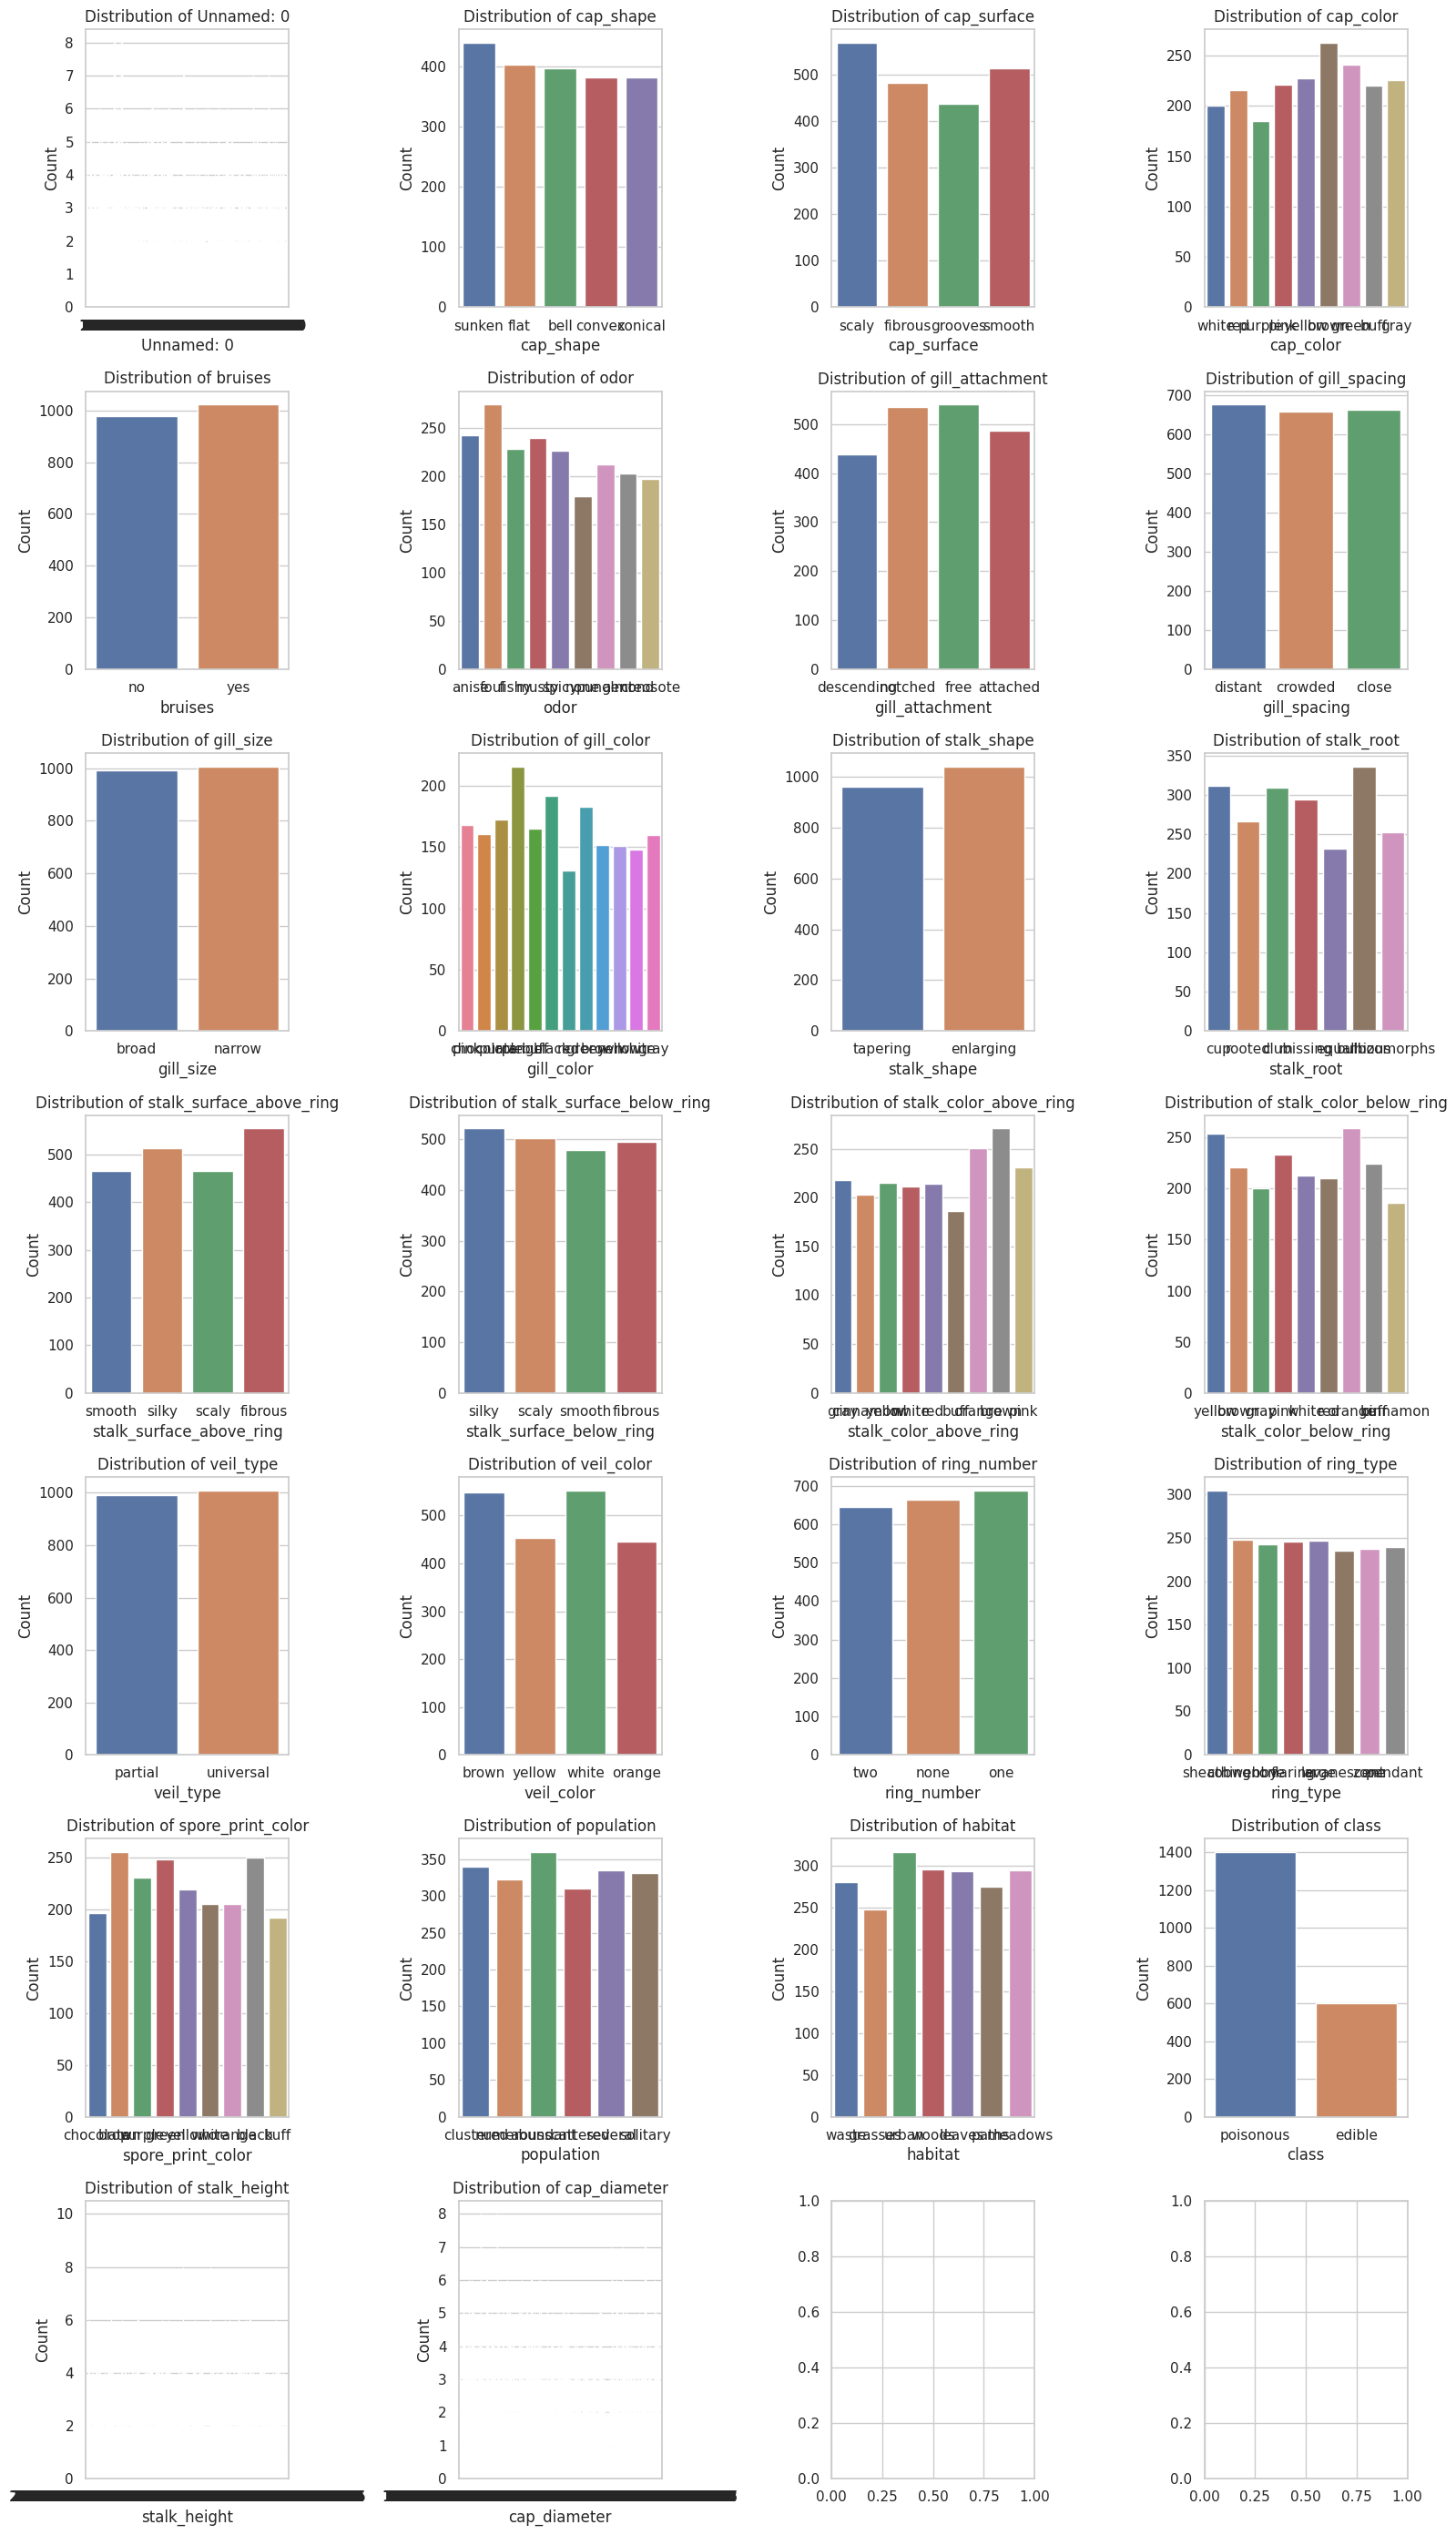

In [13]:
# Set the style for seaborn
sns.set(style="whitegrid")
#Histogram of all categorical features
def plot_histograms(df, cols, rows=5, cols_per_row=4):
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, hue=col, ax=axes[i], legend=False)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
# Plot histograms
plot_histograms(df, df.columns, rows=(len(df.columns) + 3) // 4)

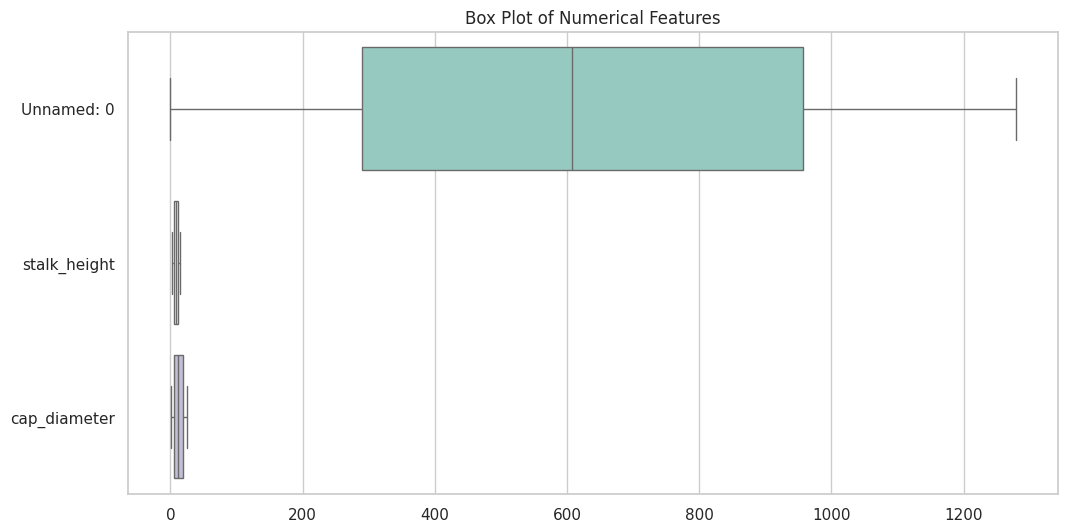

In [14]:
#Box plots
if df.select_dtypes(include=['int64', 'float64']).shape[1] > 0:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, orient='h', palette="Set3")
    plt.title('Box Plot of Numerical Features')
    plt.show()

<Figure size 1200x600 with 0 Axes>

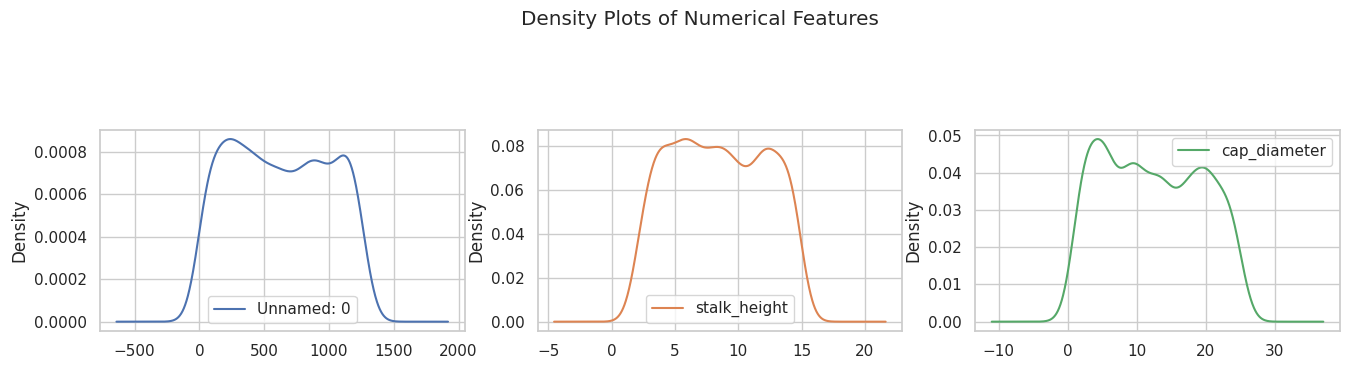

In [15]:
#Density plots (for numerical features, example provided if such features exist)
if df.select_dtypes(include=['int64', 'float64']).shape[1] > 0:
    plt.figure(figsize=(12, 6))
    df.select_dtypes(include=['int64', 'float64']).plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(16, 12))
    plt.suptitle('Density Plots of Numerical Features')
    plt.show()
else:
    print("No numerical features found for density plots or box plots.")

3.	Investigate feature correlations to discern relationships within the data.

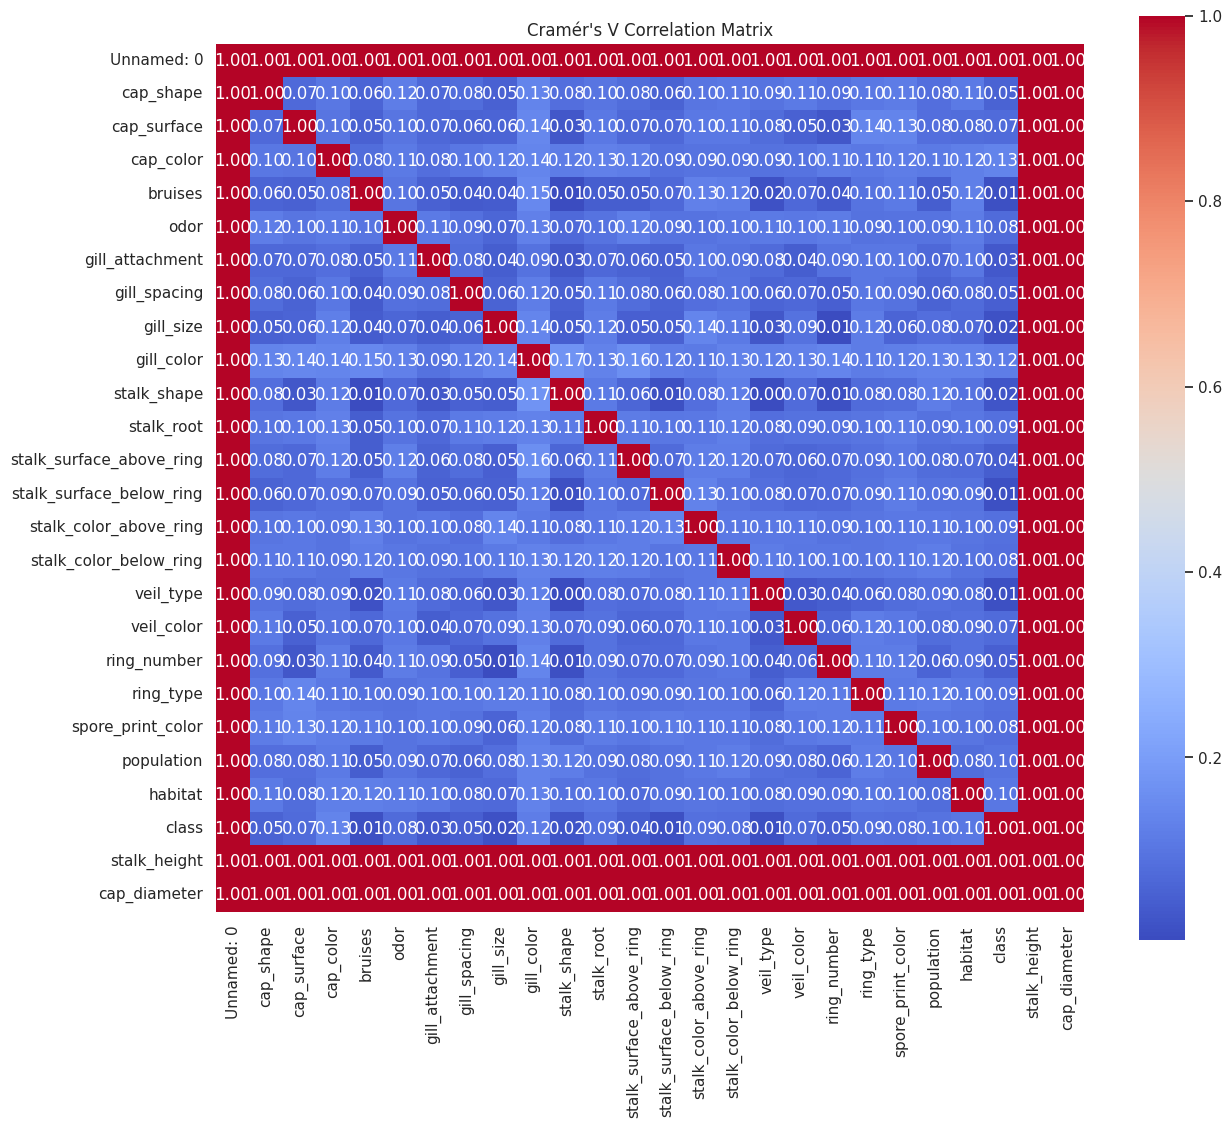

In [16]:
from scipy.stats import chi2_contingency
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate the Cramér's V correlation matrix
def calculate_cramers_v_matrix(df):
    cols = df.columns
    n = len(cols)
    cramer_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
            else:
                cramer_matrix.loc[col1, col2] = 1.0  # Diagonal correlation with itself is 1
    return cramer_matrix

# Calculate the Cramér's V correlation matrix
cramer_v_matrix = calculate_cramers_v_matrix(df)

#aaVisualization using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Cramér's V Correlation Matrix")
plt.show()

# **Task 2: Data Preprocessing**

1.	Encode categorical variables if necessary.


In [17]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding for Ordinal Features
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Label Encoded DataFrame:")
print(display(df.head()))

Label Encoded DataFrame:


Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1           916           190  
1      0           128           750  
2      1           537           281  
3      1           234           829  
4      1           895           484  

[5 rows x 26 columns]

None


In [18]:
# One-Hot Encoding for Nominal Features
# This will apply One-Hot Encoding to all columns.
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nOne-Hot Encoded DataFrame:")
print(display(df_encoded.head()))


One-Hot Encoded DataFrame:


Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1           916           190  
1      0           128           750  
2      1           537           281  
3      1           234           829  
4      1           895           484  

[5 rows x 26 columns]

None


2.	Split the dataset into training and testing sets.


In [19]:
from sklearn.model_selection import train_test_split
# Encode categorical variables (you can use Label Encoding or One-Hot Encoding as required)
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
# Assuming 'class' is the target variable. Replace 'class' with the actual target column name if different.
X = df_encoded.drop('class', axis=1)  # Adjust 'class_e' based on your encoding, or use 'class' before encoding
y = df_encoded['class']  # Adjust accordingly

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)


Training set shape (X_train): (1600, 25)
Testing set shape (X_test): (400, 25)
Training set shape (y_train): (1600,)
Testing set shape (y_test): (400,)


# **Task 3: Data Visualization**
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


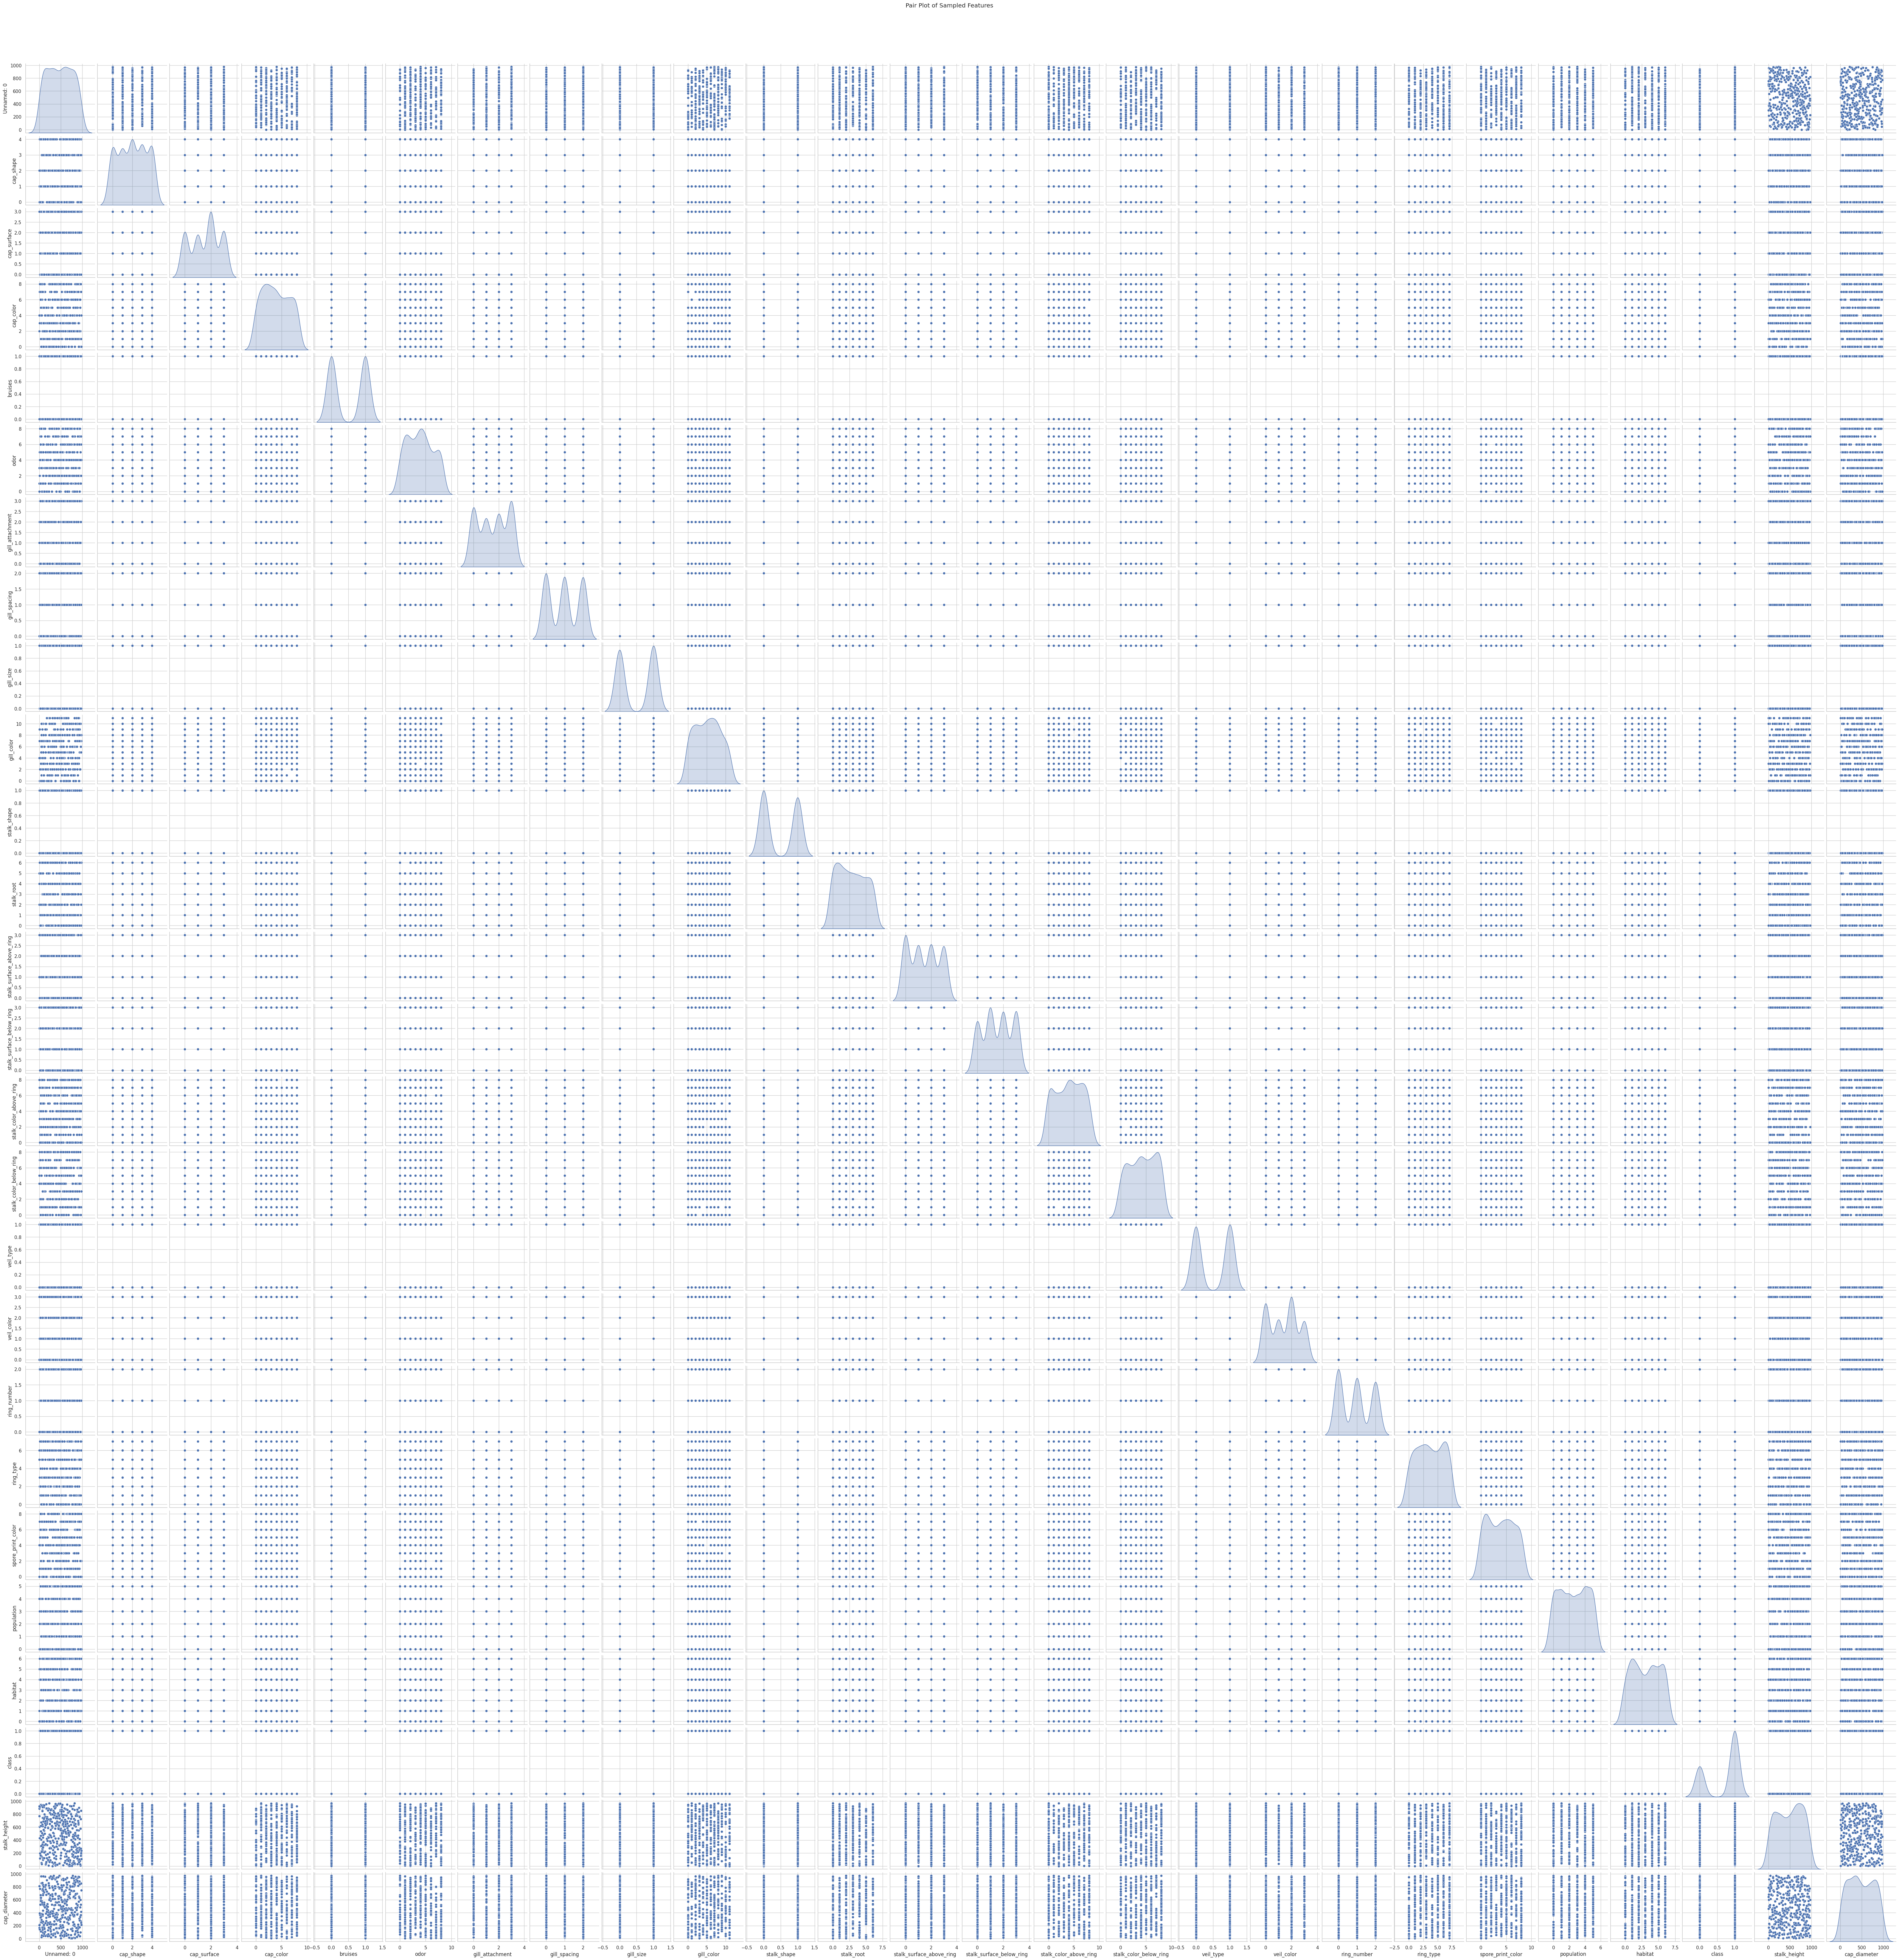

In [20]:
# Pair Plot: Visualize pairwise relationships in the dataset
sampled_df = df_encoded.sample(500)  # Adjust sample size as needed

# Pair Plot - sns.pairplot can be heavy with large data, so we sample for clarity
sns.pairplot(sampled_df, diag_kind='kde')
plt.suptitle('Pair Plot of Sampled Features', y=1.02)
plt.show()

2.	Visualize class distributions to gauge dataset balance or imbalance.


<ipython-input-21-af6a4736c906>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


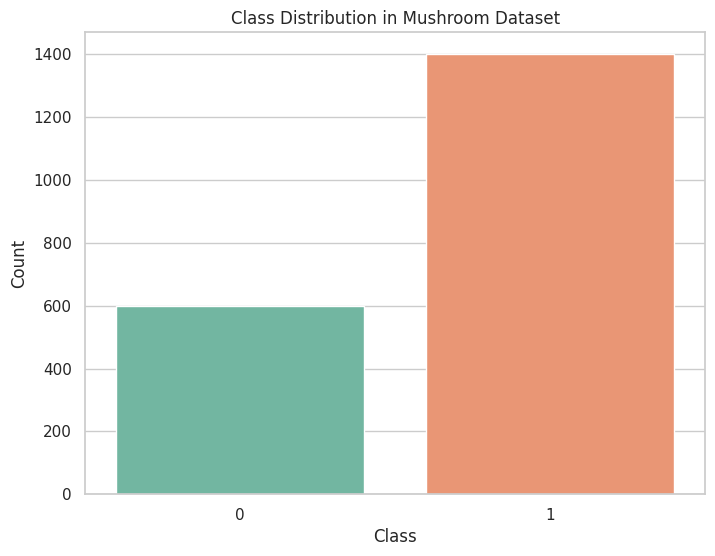

In [21]:
# Assume 'class' is the target variable
if 'class' in df.columns:
    # Visualize class distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='class', palette='Set2')
    plt.title('Class Distribution in Mushroom Dataset')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
else:
    print("No 'class' column found in the dataset.")

# **Task 4: SVM Implementation**
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.



In [22]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Feature Scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the SVM classifier: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
[[  0 133]
 [  0 267]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.	Train the SVM model on the training data.



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Encode categorical variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)
# Train the SVM model on the training data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("SVM model has been trained on the training data.")

SVM model has been trained on the training data.


3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [25]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the SVM classifier: 0.67

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
[[  0 133]
 [  0 267]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Task 5: Visualization of SVM Results**
1.	Visualize classification results on the testing data.


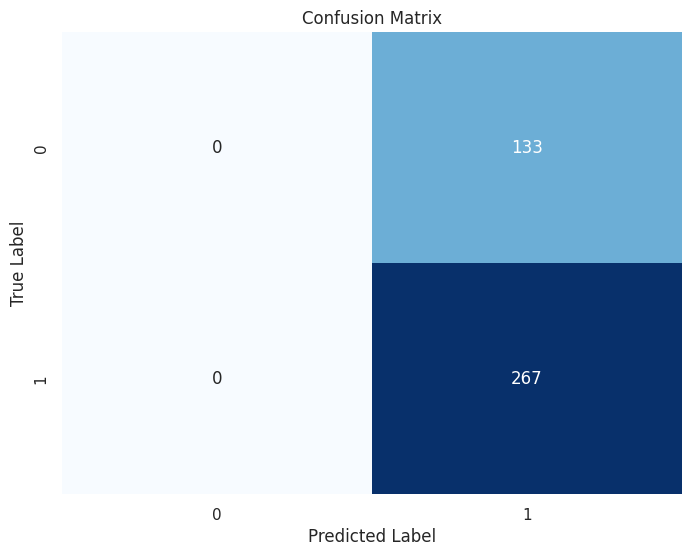

In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# 1. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

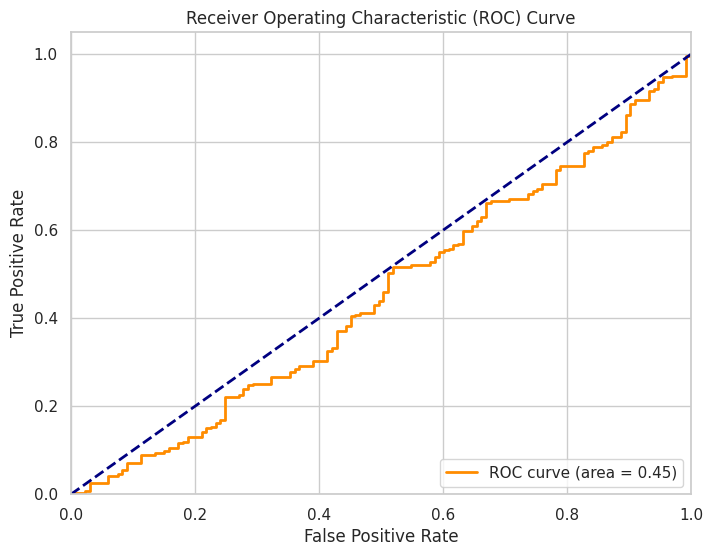

In [27]:

# 2. ROC Curve (Only for binary classification)
if len(y_test.unique()) == 2:  # Check if binary classification
    y_prob = svm_model.decision_function(X_test_scaled)  # Get the decision function scores
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve is not applicable for multi-class classification.")

In [28]:
# 3. Decision Boundary Visualization (Optional and applicable only for 2D feature spaces)
if X_train_scaled.shape[1] == 2:  # Only if we have 2 features
    h = .02  # step size in the mesh
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

# **Task 6: Parameter Tuning and Optimization**
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


When optimizing an SVM model, the choice of hyperparameters significantly impacts the model's performance. The key hyperparameters to consider include the kernel type, the regularization parameter (C), and the kernel-specific parameters like gamma.

### 1. **Kernel Type**:
   - **Linear Kernel**: This kernel is suitable when the data is linearly separable, meaning that a straight line (or hyperplane in higher dimensions) can effectively separate the classes. It's computationally less expensive and often a good starting point.
     - **When to use**: If you suspect that the relationship between your features and the target variable is linear or if you want a simpler, interpretable model.
   - **Polynomial Kernel**: This kernel can capture polynomial relationships between the features. The degree of the polynomial is a key parameter.
     - **When to use**: If the relationship between features is more complex and non-linear, particularly when interactions between features are expected.
   - **Radial Basis Function (RBF) Kernel**: The RBF kernel is widely used for non-linear classification. It maps data points into a higher-dimensional space where a linear separator can be applied.
     - **When to use**: If the data is non-linearly separable, the RBF kernel is often a good choice. It is flexible and can handle complex relationships.

### 2. **Regularization Parameter (C)**:
   - **Definition**: The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification errors.
   - **Low C (High Regularization)**: Encourages the model to create a larger margin at the cost of more classification errors. It is more tolerant of misclassified data points.
     - **When to use**: In scenarios where overfitting is a concern, or when you want a simpler, more generalized model.
   - **High C (Low Regularization)**: A higher C value aims to classify all training examples correctly by fitting the data tightly, potentially leading to overfitting.
     - **When to use**: When the data is clean and has minimal noise, or when the cost of misclassification is very high.

### 3. **Gamma (for RBF and Polynomial Kernels)**:
   - **Definition**: Gamma defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close.'
   - **Low Gamma**: A low gamma value results in a smoother decision boundary, which might miss some of the finer details in the data.
     - **When to use**: When the data is relatively simple and not very complex, or to prevent overfitting.
   - **High Gamma**: A high gamma value leads to a more complex model that fits the data very closely, capturing local structures but potentially leading to overfitting.
     - **When to use**: When the data is complex and you need the model to capture small details in the data distribution.

### 4. **Cross-Validation**:
   - **Purpose**: Cross-validation helps in assessing how well the model generalizes to an independent dataset by splitting the data into multiple training and testing sets.
   - **Method**: k-fold cross-validation is commonly used, where the dataset is split into k parts, and the model is trained k times, each time using a different part as the test set and the remaining parts as the training set.
   - **Use in Hyperparameter Tuning**: Cross-validation is essential when experimenting with hyperparameters to ensure that the model does not overfit to a particular subset of the data.

### 5. **Grid Search and Random Search**:
   - **Grid Search**: An exhaustive search over a specified parameter grid, testing all possible combinations of hyperparameters. While thorough, it can be computationally expensive.
     - **When to use**: When you have a small number of hyperparameters and values to test, or when you want a detailed understanding of how each parameter affects performance.
   - **Random Search**: Instead of testing all combinations, random search samples a fixed number of hyperparameter combinations. It is less computationally expensive and often finds a near-optimal solution more quickly.
     - **When to use**: When the hyperparameter space is large, or when computational resources are limited.

### 6. **Model Evaluation**:
   - **Metrics to Consider**: Accuracy, precision, recall, F1-score, and area under the ROC curve (AUC) are common metrics. The choice of metric depends on the problem at hand (e.g., precision vs. recall trade-off in imbalanced datasets).
   - **Confusion Matrix**: Provides insight into where the model makes errors, particularly in imbalanced datasets.

### 7. **Iterative Approach**:
   - Start with a simple kernel (e.g., linear) and default parameters.
   - Gradually experiment with more complex kernels (e.g., polynomial, RBF) and tune hyperparameters using cross-validation.
   - Regularly evaluate the model's performance on a validation set to avoid overfitting.


# **Task 7: Comparison and Analysis**
# 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


 This comparison will help us understand which kernel works best for your dataset.

### Steps:

1. **Train SVM Models with Different Kernels**: We'll train models with linear, polynomial, and radial basis function (RBF) kernels.
2. **Evaluate Performance**: For each model, we will compute and compare accuracy, precision, recall, and F1-score.
3. **Visualize the Results**: We can optionally create visualizations to compare the performance metrics.

1. **evaluate_svm_kernel Function**:
   - **Initialization**: Creates an SVM model with the specified kernel.
   - **Training**: Fits the model on the training data.
   - **Prediction**: Predicts labels on the test set.
   - **Evaluation**: Computes the accuracy and prints a detailed classification report for each kernel.

2. **Kernels Tested**:
   - **Linear ('linear')**: A linear kernel that separates data with a straight line (or hyperplane).
   - **Polynomial ('poly')**: A polynomial kernel that can capture non-linear relationships.
   - **Radial Basis Function ('rbf')**: A popular kernel that can handle non-linear data by mapping inputs into higher-dimensional space.

3. **Visualization**:
   - **Bar Plot**: Optionally, a bar plot is created to visually compare the accuracy of SVM models using different kernels.



1. **Ensure Data Preparation**: Make sure the data has been correctly loaded, encoded, split, and scaled.
2. **Run the Code**: Copy and paste the code into a Colab cell. The models will be trained and evaluated, and you'll see a comparison of the results.

- **Accuracy and Classification Report**: For each kernel, the accuracy and a detailed classification report (precision, recall, F1-score) will be printed.
- **Visualization**: A bar plot comparing the accuracy of SVM models with different kernels.

###  Interpretation:

- **Linear Kernel**: If the accuracy with a linear kernel is high, the data is likely linearly separable.
- **Polynomial Kernel**: This kernel might perform better if the data has a polynomial relationship between features.
- **RBF Kernel**: If this kernel performs the best, it suggests that the data is non-linear and benefits from being mapped into a higher-dimensional space.

This comparison helps you select the most appropriate kernel for your dataset based on empirical performance.

# 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

#### Strengths:
1. **Handling Non-Linearly Separable Data**:
   - **RBF Kernel**: SVM with the RBF kernel can effectively handle non-linear relationships in the Mushroom dataset, which might not be linearly separable due to the nature of biological data.
   
2. **Effective Feature Space Transformation**:
   - **Polynomial and RBF Kernels**: These kernels are powerful in transforming the feature space to higher dimensions, where complex patterns become linearly separable.

3. **Robust to High-Dimensional Data**:
   - **Feature-Rich Dataset**: SVM performs well with high-dimensional data, such as the Mushroom dataset with many categorical features that are one-hot encoded into numerous columns.

4. **Regularization (C Parameter)**:
   - **Control Overfitting**: The C parameter allows SVM to control the trade-off between margin size and classification errors, helping to avoid overfitting, which is crucial for the potentially noisy Mushroom dataset.

#### Weaknesses:
1. **Sensitive to Outliers**:
   - **Outliers**: SVM can be sensitive to outliers in the data, especially with small values of C, which might misclassify data points that deviate significantly from the norm.

2. **Complexity in Parameter Tuning**:
   - **Hyperparameter Sensitivity**: The performance of SVM, particularly with non-linear kernels, is highly dependent on selecting the right hyperparameters (e.g., C, gamma, and kernel). This requires extensive tuning and cross-validation.

3. **Scalability**:
   - **Training Time**: SVMs, especially with non-linear kernels like RBF, can be computationally intensive and slow to train on large datasets, making them less scalable.

4. **Interpretability**:
   - **Model Interpretability**: SVM models, particularly with non-linear kernels, are less interpretable compared to simpler models like decision trees or logistic regression, making it harder to understand the decision-making process.

### EDA and Visualization Insights:

- **Class Distribution**: If the Mushroom dataset is balanced, SVM can perform well. However, in case of imbalance, SVM might require techniques like class weighting or oversampling.
- **Feature Correlation**: The strength of correlations observed in EDA suggests that non-linear relationships exist, which RBF and Polynomial kernels can capture effectively.

### Practical Recommendations:

- **RBF Kernel**: Likely to be the best choice for the Mushroom dataset due to its ability to handle non-linearities.
- **Parameter Tuning**: Necessary to optimize the SVM model, focusing on C and gamma to balance model complexity and performance.


# 3.	Discuss practical implications of SVM in real-world classification tasks.

**1. Versatility Across Domains**:
   - **Applications**: SVMs are widely used in various fields such as bioinformatics (e.g., cancer classification), finance (e.g., credit scoring), text classification (e.g., spam detection), and image recognition.
   - **Kernel Flexibility**: The ability to choose different kernels (linear, RBF, polynomial) allows SVM to adapt to a wide range of problems, from linearly separable to highly complex, non-linear data.

**2. Strengths in High-Dimensional Spaces**:
   - **Text and Image Data**: SVM is particularly effective in high-dimensional spaces, such as in text classification (where each word is a feature) and image recognition (where each pixel is a feature). Its ability to handle a large number of features without requiring a large number of samples is a significant advantage.

**3. Robustness and Generalization**:
   - **Regularization**: The C parameter provides a way to control overfitting, making SVM robust and able to generalize well to unseen data. This is crucial in real-world scenarios where the model must perform well on new, unseen instances.

**4. Computational Complexity**:
   - **Scalability Issues**: One of the major challenges of using SVMs in practice is their computational cost, especially with large datasets or when using non-linear kernels. Training time can be prohibitive, particularly for RBF and polynomial kernels, limiting SVM’s applicability to smaller datasets or necessitating the use of linear SVM for scalability.
   
   - **Practical Limitations**: In big data contexts, SVMs might be outperformed by more scalable algorithms like Random Forests or Gradient Boosting Machines (GBMs), or deep learning models, especially when dealing with very large datasets.

**5. Interpretability and Deployment**:
   - **Model Interpretability**: SVM models, particularly with non-linear kernels, can be difficult to interpret. This can be a drawback in domains where model explainability is crucial, such as healthcare or finance.
   
   - **Deployment Considerations**: Despite their complexity, SVM models are relatively straightforward to deploy in production environments, but the need for careful tuning and potential scalability issues must be considered.

**6. Use Cases in Industry**:
   - **Healthcare**: SVMs are used for disease prediction and medical diagnosis, leveraging their ability to handle complex, high-dimensional data with precision.
   - **Finance**: SVMs are used for credit scoring, fraud detection, and stock price prediction due to their robustness and accuracy.
   - **Text and Sentiment Analysis**: In NLP, SVMs are commonly used for tasks like sentiment analysis, spam detection, and document classification.

### Practical Recommendations:

- **When to Use SVM**: Opt for SVM when dealing with high-dimensional data, where interpretability is less critical, and when the dataset size is manageable.
- **When to Consider Alternatives**: For very large datasets or when interpretability is crucial, consider alternatives like Random Forests, GBMs, or simpler models that offer faster training times and better scalability.
